<a href="https://colab.research.google.com/github/jiaojx1987/DataScience/blob/main/Showcase/Linear_Regression_Showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Showcase

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

The file FuelConsumption contains model-specific fuel consumption rating and estimated carbon dioxide emmissings for new light-duty vehicles for retail in Canada. Columns names as following:
- **MODELYEAR**: e.g. 2014
- **MAKE**: e.g. Acura
- **MODEL**: e.g. ILX
- **VEHICLECLASS**: e.g. SUV
- **ENGINESIZE**: e.g. 4.7
- **CYLINDERS**: e.g. 6
- **TRANSMISSION**: e.g. A6
- **FUELCONSUMPTION_CITY**: e.g. 9.9 (L/100km)
- **FUELCONSUMPTION_HWY**: e.g. 8.9 (L/100km)
- **FUELCONSUMPTION_COMB**: e.g. 9.2 (L/100km)
- **FUELCONSUMPTION_COMB_MPG**: e.g. 10.87 (MPG)
- **CO2EMISSIONS**: e.g. 182

In [2]:
url = "https://raw.githubusercontent.com/jiaojx1987/DataScience/main/Showcase/Dataset/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

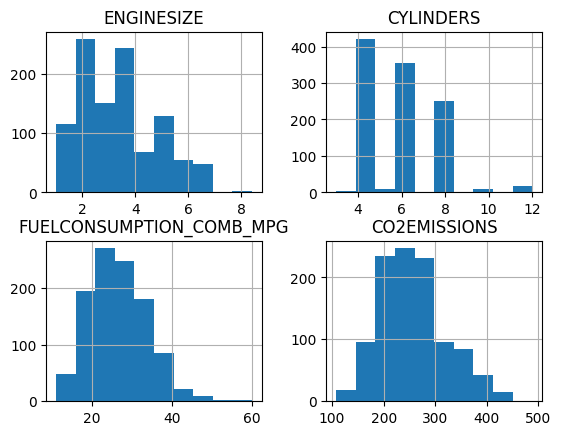

In [5]:
#plot the distribution of some features
viz = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
viz.hist()
plt.show()

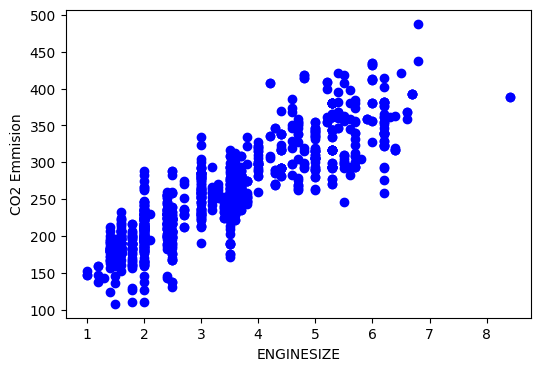

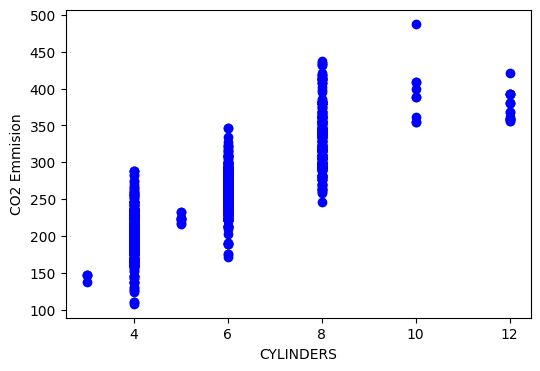

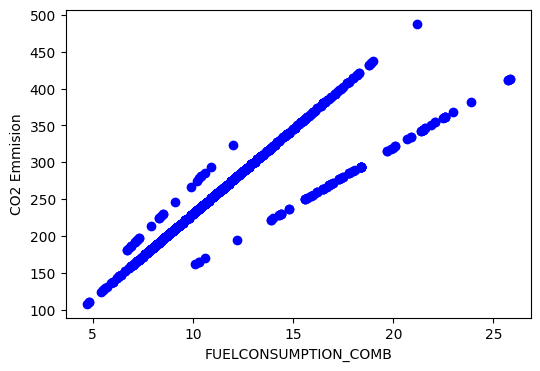

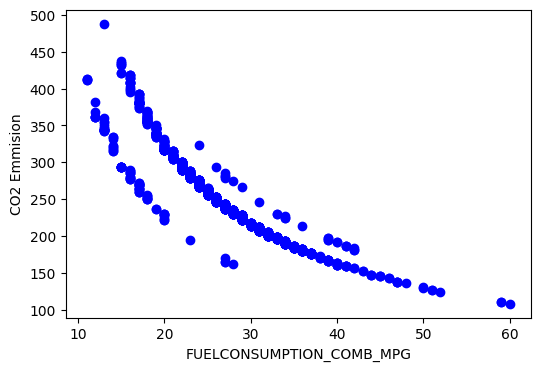

In [6]:
#plot some features against the CO2 Emission
features = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']
for feature in features:
  plt.figure(figsize=(6,4))
  plt.scatter(df[feature],df.CO2EMISSIONS, color='blue')
  plt.xlabel(feature)
  plt.ylabel('CO2 Emmision')
  plt.show()

# Now let split dataset into 80% for train and 20% for testing.

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

# Check train data distribution

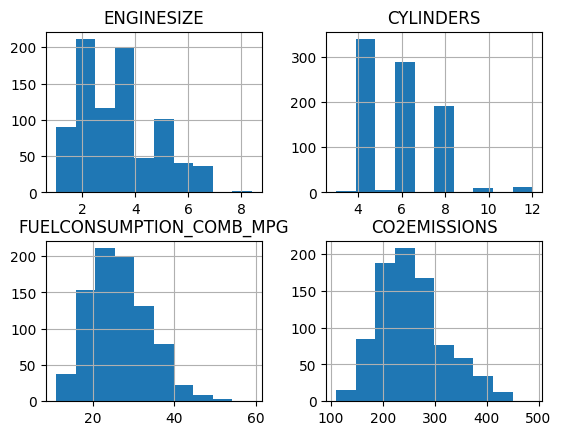

In [8]:
viz_train = train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
viz_train.hist()
plt.show()

# Modeling

In [9]:
regr = linear_model.LinearRegression()
train_X = np.asanyarray(train[['ENGINESIZE']])
train_Y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_X, train_Y)
print("Coefficients: ", regr.coef_)
print('Intercept: ',regr.intercept_)


Coefficients:  [[38.97650063]]
Intercept:  [125.72023616]


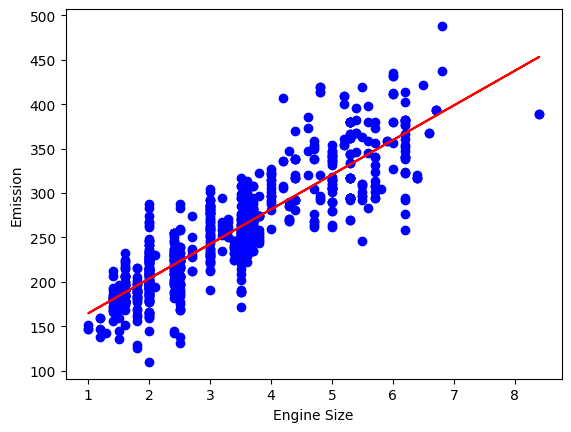

In [10]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0],'r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

# Evaluation

In [11]:
test_X = np.asanyarray(test[['ENGINESIZE']])
test_Y = np.asanyarray(test[['CO2EMISSIONS']])
pred_Y = regr.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_Y - test_Y)))
print("residual sum of squares (MSE): %.2f" % np.mean((pred_Y - test_Y)**2))
print("R2-score: %.2f" % r2_score(pred_Y, test_Y))

Mean absolute error: 23.87
residual sum of squares (MSE): 1019.17
R2-score: 0.68
